In [81]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree




<h1> <strong style="font-weight:bold; color:orange">โจทย์:</strong> สร้าง Machine Learning Models เพื่อ predict calories จากฟีทเจอร์ต่างๆ </h1>
<h3 ><strong style="font-weight:bold; color:orange">โดย:</strong> นายปุระชัย ผลวิสุทธิ์ 6441150126</h3>
<h3><strong style="font-weight:bold; color:orange">ข้อมูล:</strong> Shake Shack - Nutritional Information</h3>
<h3><strong style="font-weight:bold; color:orange">แหล่งที่มา:</strong> <a href= "https://shakeshack.com/sites/default/files/2022-09/SHA_NutritionFacts_ShakeShack-tables-September%2013%2C%202022.pdf"> Click </a></h3>


<h1> EDA Process </h1>

In [69]:
# Reading data into the project

file_path = 'archive/shake shack nutrition.csv'
data = pd.read_csv(file_path)
data

,Category,Menu,Calories,Total Fat,Sat Fat,Trans Fat,Cholesterol,Sodium,Total Carb,Fiber,Sugars,Protein
0,Burgers,Single ShackBurger®,500,30,12,1.0,105,1250,26,0,6,29
1,Burgers,Double ShackBurger®,760,48,20,2.0,185,2280,27,0,6,51
2,Burgers,Single Hamburger,370,18,8,1.0,75,850,24,0,5,25
3,Burgers,Double Hamburger,560,30,12,1.5,140,1540,24,0,5,44
4,Burgers,Single Cheeseburger,440,24,11,1.0,95,1200,25,0,5,29
...,...,...,...,...,...,...,...,...,...,...,...,...
149,Beer & Wines,Shack Red Bottle (750 ml),620,0,0,0.0,0,0,19,0,0,1
150,Beer & Wines,Shack Red Can (8.4 oz),210,0,0,0.0,0,10,6,0,0,0
151,Beer & Wines,Shack White Can (8.4 oz),200,0,0,0.0,0,10,5,0,0,0
152,Beer & Wines,Shack Rosé Can (8.4 oz),210,0,0,0.0,0,10,9,0,0,1


<h2 style="font-weight:bold; color:lightblue">EDA1 :Dataset Overview</h2>


In [70]:
# EDA1 : Dataset Overview

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category     154 non-null    object 
 1   Menu         154 non-null    object 
 2   Calories     154 non-null    object 
 3   Total Fat    154 non-null    object 
 4   Sat Fat      154 non-null    object 
 5   Trans Fat    154 non-null    float64
 6   Cholesterol  154 non-null    int64  
 7   Sodium       154 non-null    object 
 8   Total Carb   154 non-null    object 
 9   Fiber        154 non-null    int64  
 10  Sugars       154 non-null    object 
 11  Protein      154 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 14.6+ KB


<h3 style="font-weight:bold; color:orange">Take Away</h3>
<p>มีข้อมูลทั้งหมด 12 คอลัมน์</p> <p> ข้อมูลบางส่วนเป็นตัวเลข แต่เป็นประเภท object จึงจะต้องมีการแปลงประเภทข้อมูลใหม่ก่อนใช้</p><p>มีคอลัมน์ที่น่าสนใจก็คือ Calories ซึ่งอาจถูก predict ได้ด้วยข้อมูลในคอลัมน์ nutrition ต่างๆ </p>

<h2 style="font-weight:bold; color:lightblue">EDA2 : Missing Data Analysis</h2>


In [71]:
# EDA2 : Missing Data Analysis

data.isnull().sum()

Category       0
Menu           0
Calories       0
Total Fat      0
Sat Fat        0
Trans Fat      0
Cholesterol    0
Sodium         0
Total Carb     0
Fiber          0
Sugars         0
Protein        0
dtype: int64

<h3 style="font-weight:bold; color:orange">Take Away</h3>
<p>ไม่มีคอลัมน์ไหนที่มี missing values อยู่เลย</p>

<h2 style="font-weight:bold; color:lightblue">EDA3 : Unique Values Identification</h2>


In [72]:
# EDA3 : Unique Values Identification

data.head()

,Category,Menu,Calories,Total Fat,Sat Fat,Trans Fat,Cholesterol,Sodium,Total Carb,Fiber,Sugars,Protein
0,Burgers,Single ShackBurger®,500,30,12,1.0,105,1250,26,0,6,29
1,Burgers,Double ShackBurger®,760,48,20,2.0,185,2280,27,0,6,51
2,Burgers,Single Hamburger,370,18,8,1.0,75,850,24,0,5,25
3,Burgers,Double Hamburger,560,30,12,1.5,140,1540,24,0,5,44
4,Burgers,Single Cheeseburger,440,24,11,1.0,95,1200,25,0,5,29


<h3 style="font-weight:bold; color:orange">Take Away</h3>

<p><strong style="color:red;">Unique Values Identifier :</strong> ชื่อของเมนูที่อยู่ในคอลัมน์ <span style="text-decoration: underline;">Menu</span> </p>

<p><strong style="color:green;">Categorical Data :</strong> ชื่อของประเภทอาหารในคอลัมน์ <span style="text-decoration: underline;">Category</span> </p>

<h1><span style="font-weight:bold; color:red">ปัญหาที่พบจากการตรวจสอบข้อมูล: </span> </h1>
<ul>
<li>ข้อมูลบางคอลัมน์ควรจะเป็น float แต่กลับเป็น object หรือ int ซึ่งทำให้ไม่สามารถนำมาคำนวณได้</li>
<li>เมื่อจะทำการ convert จาก object/int กลายเป็น float กลับทำไม่ได้ เพราะว่ามีข้อมูลบาง entries ที่ให้ค่าเป็นช่วง เช่น 5-10, 20-30 เป็นต้น  ซึ่งจริงๆ แล้วควรจะต้องคำนวณเป็นตัวเลขตัวเดียวมา</li>
</ul>

<h3 style="font-weight:bold; color:orange">การแก้ไขปัญหา</h3>


In [73]:
# สร้างฟังก์ชั่นสำหรับแปลงค่า int และ object ให้กลายเป็น float โดยหากข้อมูลเป็นช่วง จะนำเลขต้นและเลขท้ายมาหาค่าเฉลี่ย

def convert_to_float(value):
    if isinstance(value, str) and '-' in value:
        low, high = value.split('-')
        return (float(low) + float(high)) / 2
    elif isinstance(value, str):
        return float(value)
    elif isinstance(value, (int, float)):
        return float(value)
    else:
        return value

<h3 style="font-weight:bold; color:orange">ตรวจสอบว่าข้อมูลของคอลัมน์ที่ต้องการนำมาคำนวณได้ถูกแปลงเป็น float สำเร็จแล้ว</h3>


In [74]:
columns_to_convert = data.columns[2:12]

data[columns_to_convert] = data[columns_to_convert].apply(lambda x: x.apply(convert_to_float))

data.info()

TypeError: 'list' object is not callable

<h2 style="font-weight:bold; color:lightblue">EDA4 :  Distribution of Numerical Variables</h2>


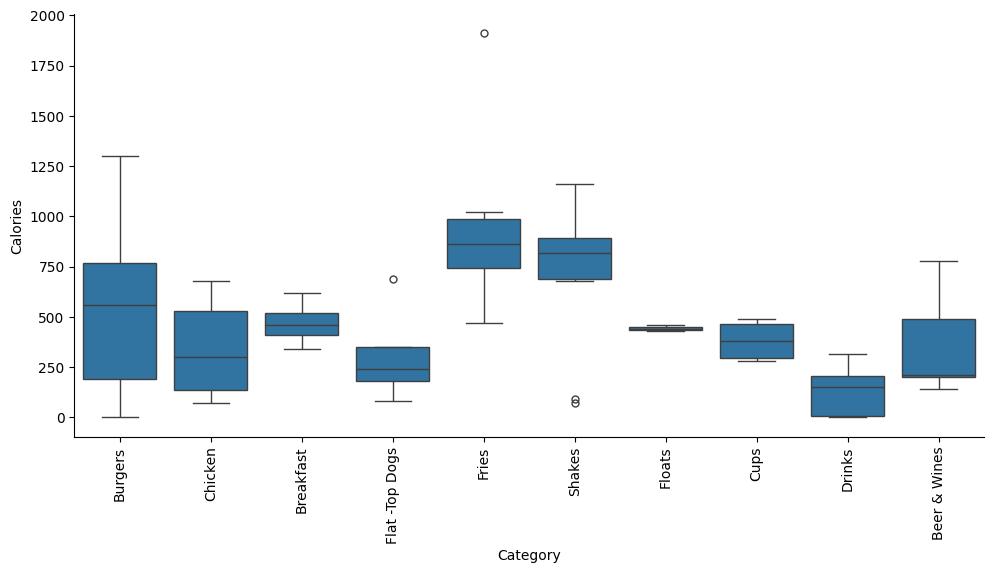

In [ ]:
g = sns.catplot(x='Category', y='Calories', kind='box', data=data, height=5, aspect=2)
plt.xticks(rotation=90)

plt.show()

<h3 style="font-weight:bold; color:orange">Take Away</h3>
<p>จากกราฟแสดงให้เห็นลักษณะการกระจายตัวของแคลอรี่ในอาหารแต่ละประเภท เพื่อนำไปประกอบการวิเคราะห์</p>

<h2 style="font-weight:bold; color:lightblue">EDA5 :  Categorical Data Analysis</h2>


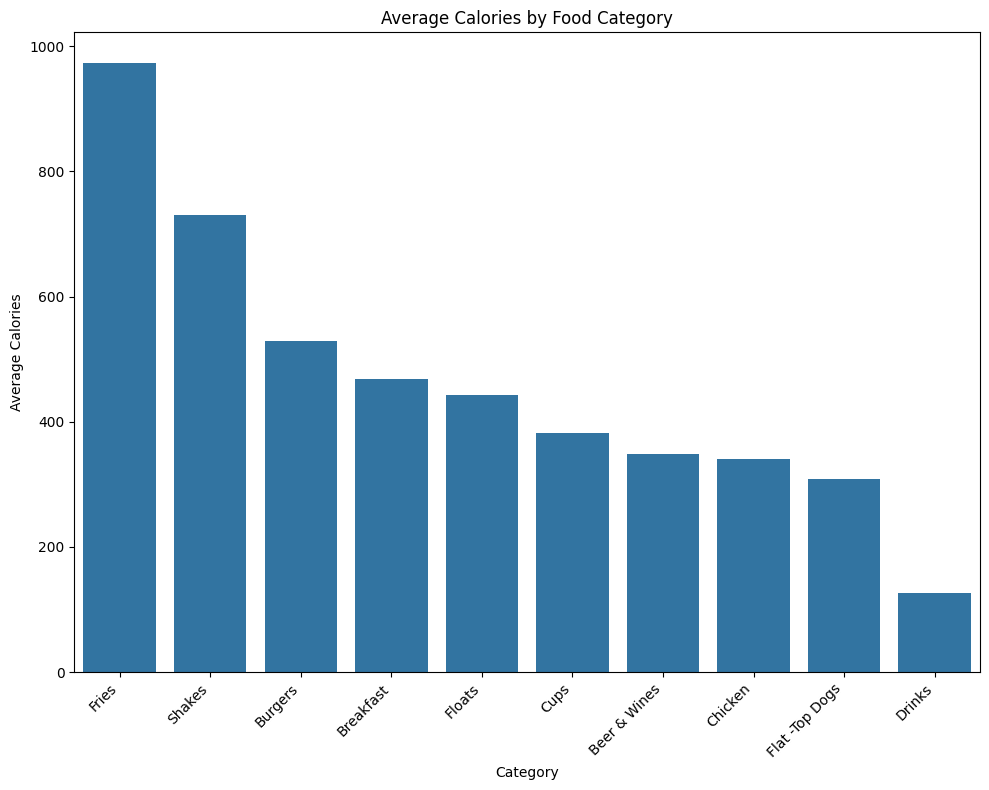

In [ ]:
# กราฟแสดงแคลอรี่เฉลี่ยในอาหารแต่ละประเภท

mean_calories = data.groupby('Category')['Calories'].mean().reset_index()
mean_calories = mean_calories.sort_values(by='Calories',ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Category', y='Calories', data=mean_calories)
plt.xticks(rotation=45, ha='right')
plt.title('Average Calories by Food Category')
plt.ylabel('Average Calories')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

<h3 style="font-weight:bold; color:orange">Take Away</h3>
<p>จากกราฟแสดงให้เห็นจำนวนแคลอรี่เฉลี่ยแยกตามประเภทของอาหาร น่าสนใจที่ Fries และ Shakes ให้พลังงานมากกว่า Burgers เสียอีก</p>
<p>นอกจากนี้ก็ยังแสดงให้เห็นว่า Drinks มีการให้พลังงานน้อยกว่าอาหารประเภทอื่นๆ อยู่มากด้วย

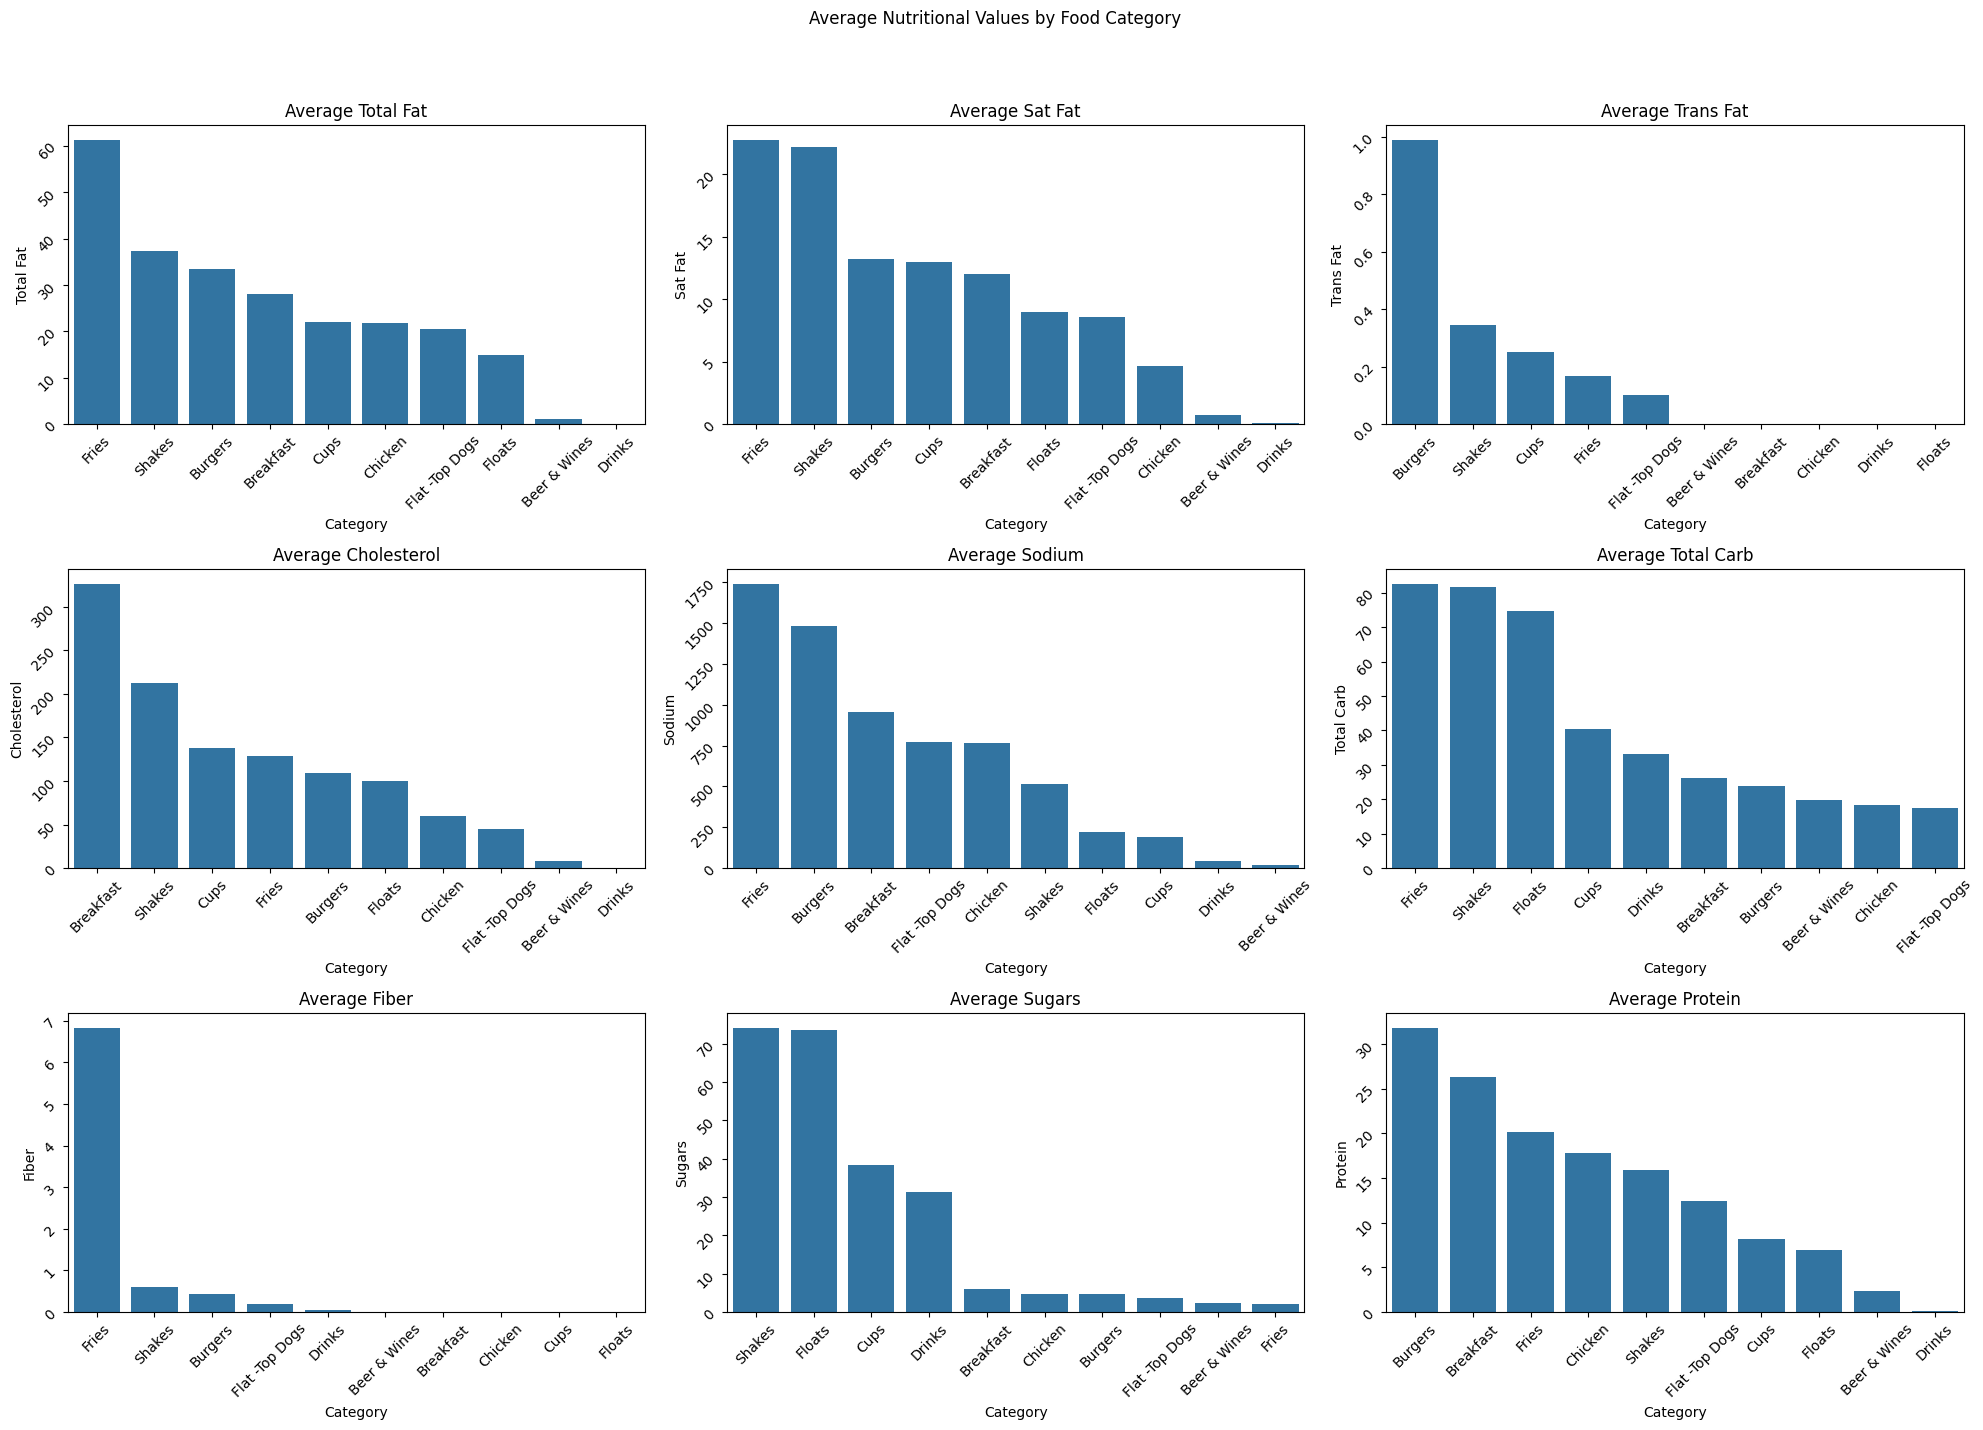

In [ ]:
# กราฟแสดงค่าเฉลี่ยของสารอาหารประเภทต่างๆในอาหารแต่ละประเภท

metrics = ['Total Fat', 'Sat Fat', 'Trans Fat', 'Cholesterol', 'Sodium', 'Total Carb', 'Fiber', 'Sugars', 'Protein']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Average Nutritional Values by Food Category')

axes = axes.flatten()

for i, metric in enumerate(metrics):
    mean_values = data.groupby('Category')[metric].mean().reset_index()
    mean_values = mean_values.sort_values(by=metric, ascending=False)
    sns.barplot(x='Category', y=metric, data=mean_values, ax=axes[i])
    axes[i].set_title(f'Average {metric}')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(labelrotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

<h3 style="font-weight:bold; color:orange">Take Away</h3>
<p>จากกราฟแสดงให้เห็นถึงความแตกต่างของโภชนาการทางอาหารที่สามารถพบได้ในอาหารแต่ละประเภทอย่างชัดเจน</p>

<h2 style="font-weight:bold; color:lightblue">EDA6 :  Summary statistics</h2>


In [ ]:
category_descriptive_stats = data.groupby('Category').describe()

print(category_descriptive_stats)


               Calories                                                      \
                  count        mean         std    min    25%    50%    75%   
Category                                                                      
Beer & Wines       13.0  349.230769  211.007960  140.0  200.0  210.0  490.0   
Breakfast           6.0  468.333333   99.883265  340.0  407.5  460.0  520.0   
Burgers            49.0  529.734694  348.387761    1.0  190.0  560.0  770.0   
Chicken             7.0  340.000000  241.936631   70.0  135.0  300.0  530.0   
Cups                6.0  381.666667   98.064605  280.0  295.0  380.0  465.0   
Drinks             46.0  126.195652  100.648921    0.0    5.0  150.0  205.0   
Flat -Top Dogs      5.0  308.000000  234.882950   80.0  180.0  240.0  350.0   
Floats              3.0  443.333333   15.275252  430.0  435.0  440.0  450.0   
Fries               6.0  973.333333  495.365185  470.0  742.5  865.0  987.5   
Shakes             13.0  730.769231  314.919607   70

<h3 style="font-weight:bold; color:orange">Take Away</h3>
<p>จากตารางแสดงให้เห็นถึงค่าสถิติต่างๆ เช่น mean std, min, max, count สำหรับดูเพื่อเข้าใจข้อมูลในเบื้องต้น</p>

<h2 style="font-weight:bold; color:lightblue">EDA7 : Correlation Analysis</h2>


In [ ]:
data_numeric = data.drop(['Menu','Category','Total Fat'], axis=1)

data_numeric
correlation_matrix = data_numeric.corr()

print(correlation_matrix)

             Calories   Sat Fat  Trans Fat  Cholesterol    Sodium  Total Carb  \
Calories     1.000000  0.927296   0.652217     0.779159  0.799969    0.599676   
Sat Fat      0.927296  1.000000   0.691715     0.864489  0.795649    0.501749   
Trans Fat    0.652217  0.691715   1.000000     0.540052  0.823081    0.057648   
Cholesterol  0.779159  0.864489   0.540052     1.000000  0.657129    0.389929   
Sodium       0.799969  0.795649   0.823081     0.657129  1.000000    0.150615   
Total Carb   0.599676  0.501749   0.057648     0.389929  0.150615    1.000000   
Fiber        0.371712  0.294709  -0.011015     0.101895  0.282528    0.435318   
Sugars       0.156696  0.163647  -0.143928     0.175104 -0.252059    0.771370   
Protein      0.790047  0.802056   0.867710     0.738292  0.946653    0.111657   

                Fiber    Sugars   Protein  
Calories     0.371712  0.156696  0.790047  
Sat Fat      0.294709  0.163647  0.802056  
Trans Fat   -0.011015 -0.143928  0.867710  
Cholesterol  

<h3 style="font-weight:bold; color:orange">Take Away</h3>
<p>จากตารางแสดงให้เห็นถึงค่า Correlation ต่างๆ ซึ่งจากที่เห็นก็จะพบว่าฟีทเจอร์บางประเภทก็มีความเกี่ยวข้องระหว่างกันเอง ทำให้เกิด multicolinearity</p>

<h1 style="font-weight:bold; color:lightblue">Machine Learning Models</h1>
<h3> เป้าหมายในการสร้าง Models : เพื่อทำนายแคลอรี่ของอาหารจากสารอาหารต่างๆ </h3>
<h3> ประโยชน์ในทางปฏิบัติ </h3>
<ul>
    <li>ภาคประชาชน: สามารถคาดการณ์ปริมาณแคลอรี่ได้อย่างคร่าวๆ ทำให้สามารถรักษาสุขภาพและรักษาสิทธิ์ของตนเองได้ </li>
    <li>ภาคธุรกิจ: ใช้ในหลายธุรกิจ เช่น ธุรกิจคนรักสุขภาพ-สร้างแอพสำหรับคำนวณแคลอรี่ของสินค้าที่จะบริโภคเพื่อตรวจสอบความถูกต้อง, ธุรกิจผลิตอาหาร-สามารถช่วยในการตรวจสอบความถูกต้องในด้านคุณค่าทางอาหารของผลิตภัณฑ์ได้ </li>
    <li>ภาครัฐ:  ใช้สำหรับตรวจสอบและวัดคุณค่าทางอาหารให้เป็นไปตามความเป็นจริง โดยหาก AI ตรวจสอบว่ามีความผิดปกติ ก็จะทำให้เจ้าหน้าที่สามารถตรวจสอบหาข้อผิดพลาดนั้นได้ </li>
</ul>

<h3 style="font-weight:bold; color:orange">สร้าง pairplot สำหรับดูประกอบลักษณะของข้อมูลในเบื้องต้น เพื่อเสริมสร้างความเข้าใจในการทำ multiple linear regression</h3>


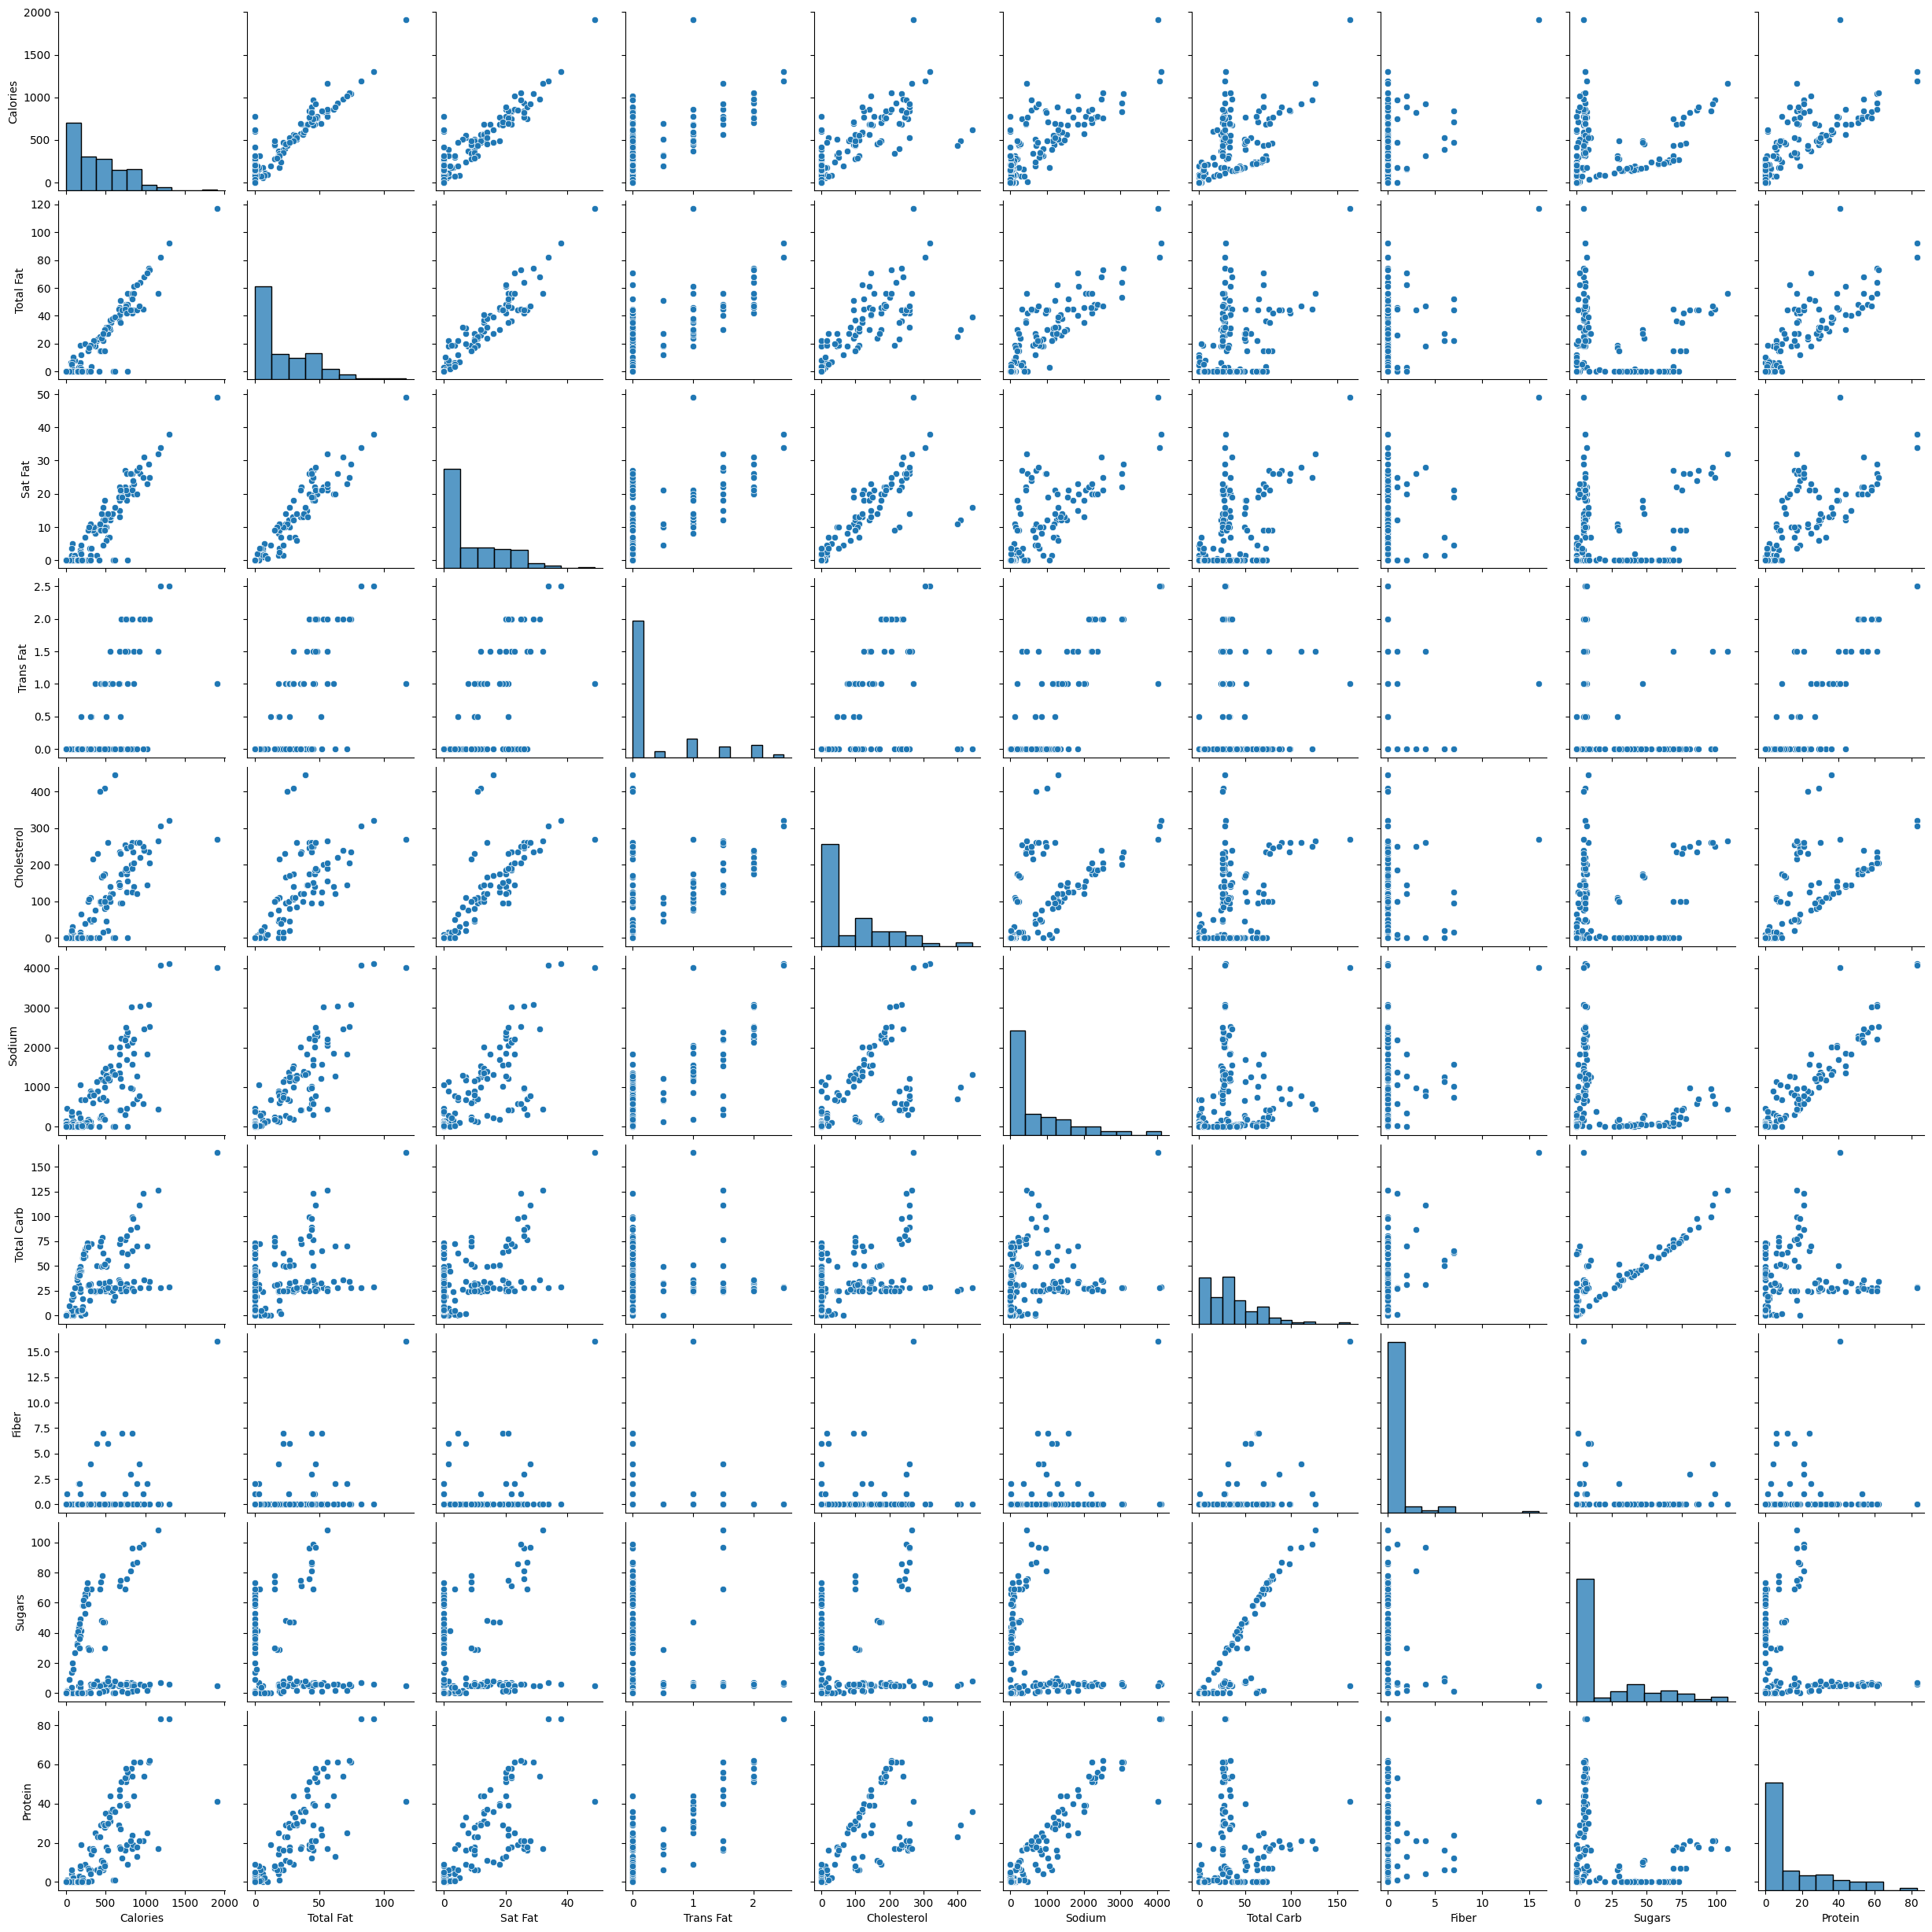

In [ ]:
sns.pairplot(data)


<h3 style="font-weight:bold; color:orange">Take Away</h3>
<p>จากกราฟแสดงให้เห็นถึงการกระจายตัวและหน้าตาของข้อมูล โดยส่วนใหญ่มักจะมีลักษณะเพิ่มขึ้นตามกัน ในขณะที่บางกราฟก็ไม่มี pattern ที่ชัดเจน</p>

<h2 style="font-weight:bold; color:lightblue">Model 1 : Multiple Linear Regression</h2>

<h3 style="font-weight:bold; color:orange">คำอธิบาย Models</h3>
<p><span style="font-weight:bold;">ชื่อ :</span>Multiple Linear Regression</p>
<p><span style="font-weight:bold;">หลักการ :</span>ตั้งสมมติฐานว่าแคลอรี่มีความสัมพันธ์แบบเส้นตรงกับฟีทเจอร์ต่างๆหลายฟีทเจอร์รวมกัน ซึ่งได้แก่คุณค่าทางอาหารต่างๆ (ไม่ใช้ Total Fat)</p>
<p><span style="font-weight:bold;">วิธีการ :</span>ตัดข้อมูลประเภท Drinks ออก เพื่อเพิ่มความแม่นยำของโมเดล และใช้อัตราส่วน train:test ที่ 70:30</p>
<p><span style="font-weight:bold;">เหตุผลที่เลือกโมเดลนี้ :</span>เป็นโมเดลเริ่มต้นที่ตรงกับความต้องการในการใช้และเข้าใจง่ายที่สุด</p>
<p><span style="font-weight:bold;">ผลการประเมินโมเดล :</span>MSE: 4222.91
R2 Score: 0.96</p>

In [ ]:
# ตัด Drinks ออกจากการคำนวณเนื่องจากอาจทำให้โมเดลมีประสิทธิภาพน้อยลง

data_filtered = data[data['Category'] != 'Drinks']


In [77]:

# กำหนดฟีทเจอร์เป็นคุณค่าทางโภชนาการต่างๆ โดยตัด Total Fat ออก เนื่องจาก Sat และ Trans Fat มีความครอบคลุมในส่วนนั้นแล้ว
X = data_filtered[['Sat Fat','Trans Fat', 'Cholesterol', 'Sodium', 'Total Carb', 'Fiber', 'Sugars', 'Protein']]
y = data_filtered['Calories']

# แบ่ง train:test ที่ 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# ประเมิน Models
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# หา Features Importances
feature_importance1 = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
print(feature_importance1)

Mean Squared Error: 4222.91
R^2 Score: 0.96
             Coefficient
Sat Fat        14.775179
Total Carb      8.625032
Protein         5.750101
Sodium         -0.009448
Cholesterol    -0.232277
Sugars         -5.422815
Trans Fat     -16.782374
Fiber         -25.034114


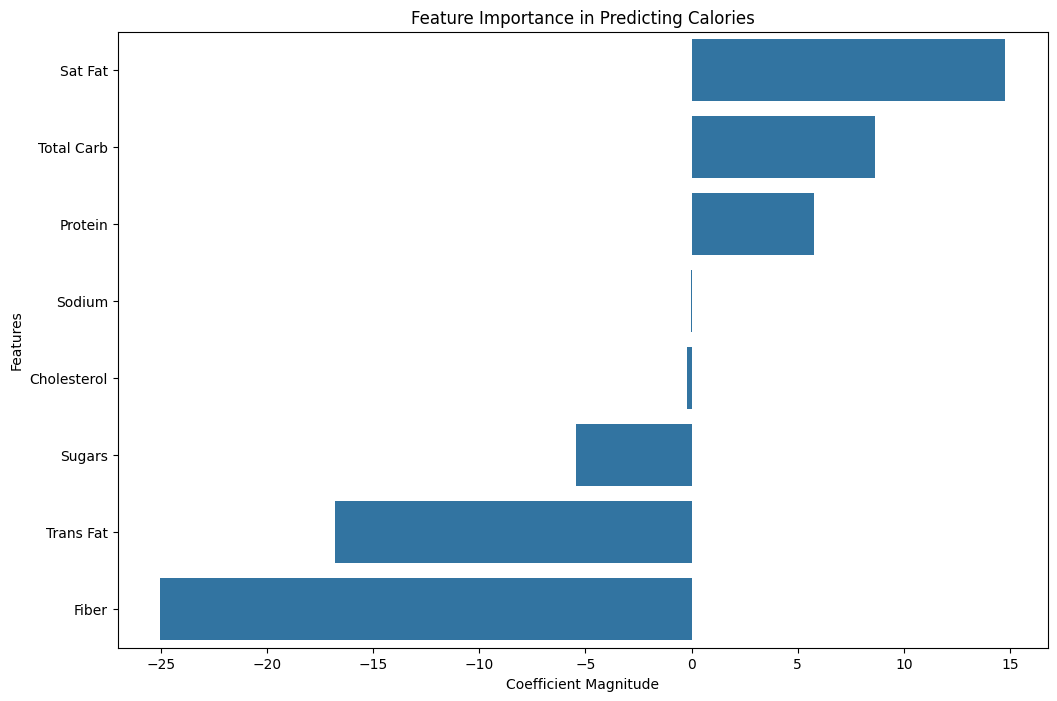

In [78]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance1['Coefficient'], y=feature_importance1.index)
plt.title('Feature Importance in Predicting Calories')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.show()

<h3 style="font-weight:bold; color:orange">Calories Prediction</h3>

<pre>predict calories [[Sat Fat,Trans Fat,Cholesterol,Sodium,Total Carb,Fiber,Sugars,Protein]]</pre>


<pre>
* Burgers,"Green Chile CheddarShack, Double",                          750 Cal = 22,1.5,185,2190,28,1,6,53
* Breakfast,Egg and Cheese Breakfast Sandwich,                         530 Cal = 14,0.0,260,1220,28,0,8,30
* Flat -Top Dogs,Add Cheese Sauce,                                      80 Cal = 5,0.0,30,95,1,0,0,2
* Shakes,Vanilla Shake,                                                680 Cal = 22,0.0,235,430,72,0,71,18
* Fries,Hot Ones Cheese Fries,                                         890 cal = 20,0.0,120,1270,70,2,2,13
* Floats,Root Beer Float,                                              430 cal = 9,0.0,100,220,70,0,69,7
* Beer & Wines,Brooklyn Brewery ShackMeister Ale (60oz. Draft),        780 cal = 0,0.0,0,0,62,0,0,9
</pre>


In [92]:
# ตั้งตัวแปรสำหรับเก็บข้อมูลไว้สำหรับใช้เทส model
burger = [22,1.5,185,2190,28,1,6,53]
burger_cal = 750

breakfast = [14,0.0,260,1220,28,0,8,30]
breakfast_cal = 530

flat = [5,0.0,30,95,1,0,0,2]
flat_cal = 80

shake = [22,0.0,235,430,72,0,71,18]
shake_cal = 680

fries = [20,0.0,120,1270,70,2,2,13]
fries_cal = 890

float = [9,0.0,100,220,70,0,69,7]
float_cal = 430

beer = [0,0.0,0,0,62,0,0,9]
beer_cal = 780

custom_datas = [burger, breakfast, flat, shake, fries, float, beer]
actual_calories = [burger_cal, breakfast_cal, flat_cal, shake_cal, fries_cal, float_cal, beer_cal]


In [91]:
# Predict MLR

for custom_data, actual_cal in zip(custom_datas, actual_calories):
    custom_data_reshaped = [custom_data]  # Reshape for prediction
    custom_pred = model.predict(custom_data_reshaped)  # Use the correct model for prediction
    print(f'Predicted Calories: {custom_pred[0]:.2f}, Actual Calories: {actual_cal}')


Predicted Calories: 786.65, Actual Calories: 750
Predicted Calories: 567.30, Actual Calories: 530
Predicted Calories: 147.88, Actual Calories: 80
Predicted Calories: 667.64, Actual Calories: 680
Predicted Calories: 934.97, Actual Calories: 890
Predicted Calories: 439.25, Actual Calories: 430
Predicted Calories: 648.25, Actual Calories: 780


c:\Users\Win-hunter21346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Win-hunter21346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Win-hunter21346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Win-hunter21346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Win-hunter21346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarn

<h3 style="font-weight:bold; color:orange">Take Away</h3>
<p>Model ที่ 1 ให้คำตอบใกล้เคียงกับ burger, breakfast, shake, fries, และ float ซึ่งแสดงให้เห็นว่าสามารถรันได้จริงในระดับหนึ่งแล้ว</p>

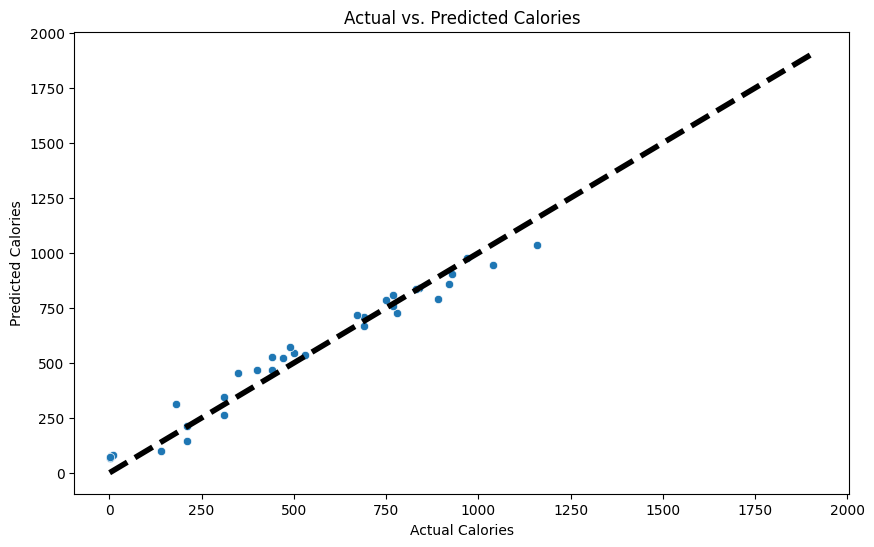

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line for reference
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs. Predicted Calories')
plt.show()

<h2 style="font-weight:bold; color:lightblue">Model 2: Ridge Regression</h2>

<h3 style="font-weight:bold; color:orange">คำอธิบาย Models</h3>
<p><span style="font-weight:bold;">ชื่อ : </span>Ridge Regression</p>
<p><span style="font-weight:bold;">หลักการ :</span>เป็นส่วนขยายเพิ่มเติมของ linear regression แต่มีการเพิ่ม penalty terms เพื่อช่วยลดกรณีของการ overfitting ในกรณีที่หลายฟีทเจอร์มี multicolinearity</p>
<p><span style="font-weight:bold;">วิธีการ :</span>ตัดข้อมูลประเภท Drinks ออก เพื่อเพิ่มความแม่นยำของโมเดล และใช้อัตราส่วน train:test ที่ 70:30 และลองกำหนดค่า alpha เพื่อหาผลลัพธ์ที่ดีที่สุด</p>
<p><span style="font-weight:bold;">เหตุผลที่เลือกโมเดลนี้ :</span>เป็นโมเดล linear regression ที่ดีกว่า multiple linear regression ในกรณีนี้ เนื่องจากฟีทเจอร์มี multicolinearity กันมากเกินไป ดังที่ได้ลองวิเคราะห์แล้วใน EDA7</p>
<p><span style="font-weight:bold;">ผลการประเมินโมเดล :</span>MSE: 3939.84
R2 Score: 0.96</p>

In [ ]:

X = data_filtered[[ 'Sat Fat', 'Trans Fat', 'Cholesterol', 'Sodium', 'Total Carb', 'Fiber', 'Sugars', 'Protein']]
y = data_filtered['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=1.0) 
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

feature_importance = pd.DataFrame(ridge.coef_, index=X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
print(feature_importance)


Mean Squared Error: 3939.8366121754916
R^2 Score: 0.9631426525190635
             Coefficient
Total Carb    225.989371
Sat Fat       134.820886
Protein        99.619119
Sodium         16.517780
Trans Fat      -4.055013
Cholesterol   -14.875957
Fiber         -43.445610
Sugars       -108.229067


In [93]:

# Predict Ridge Regression
# ดึงตัวแปรที่สร้างไว้จากโมเดลแรกมาใช้ในการ predict ซ้ำ


for custom_data, actual_cal in zip(custom_datas, actual_calories):
    custom_data_reshaped = [custom_data]
    custom_data_scaled = scaler.transform(custom_data_reshaped)
    custom_pred = ridge.predict(custom_data_scaled)
    
    print(f'Predicted Calories: {custom_pred[0]:.2f}, Actual Calories: {actual_cal}')



Predicted Calories: 785.60, Actual Calories: 750
Predicted Calories: 565.19, Actual Calories: 530
Predicted Calories: 148.38, Actual Calories: 80
Predicted Calories: 662.35, Actual Calories: 680
Predicted Calories: 905.81, Actual Calories: 890
Predicted Calories: 450.18, Actual Calories: 430
Predicted Calories: 609.49, Actual Calories: 780


c:\Users\Win-hunter21346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Win-hunter21346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Win-hunter21346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Win-hunter21346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Win-hunter21346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X d

<h3 style="font-weight:bold; color:orange">Take Away</h3>
<p>Model ที่ 2 ให้คำตอบใกล้เคียงกับผลลัพธ์จริงๆ มากกว่า Model ที่ 1 ในส่วนของ burger, breakfast, flat, shake, และ fries แต่ในทางกลับกัน float และ beer กลับมีความคลาดเคลื่อนยิ่งกว่าเดิม</p>

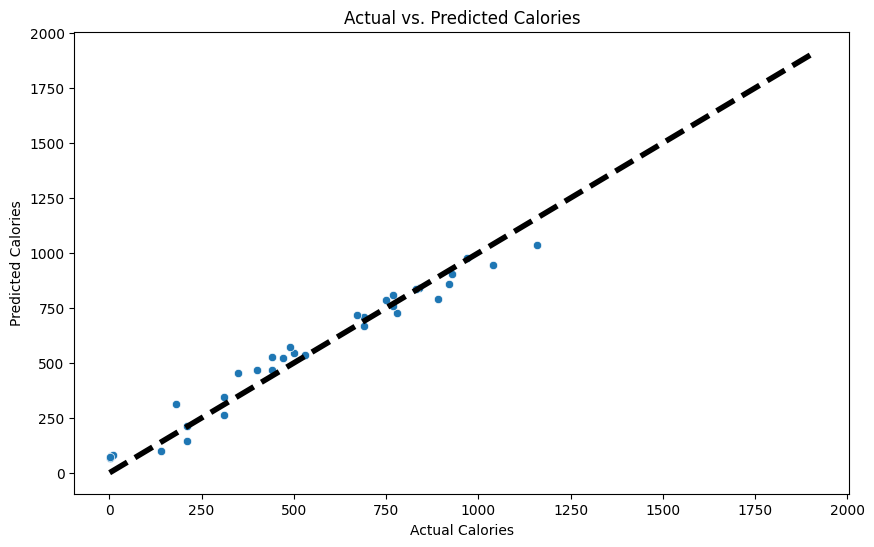

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line for reference
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs. Predicted Calories')
plt.show()

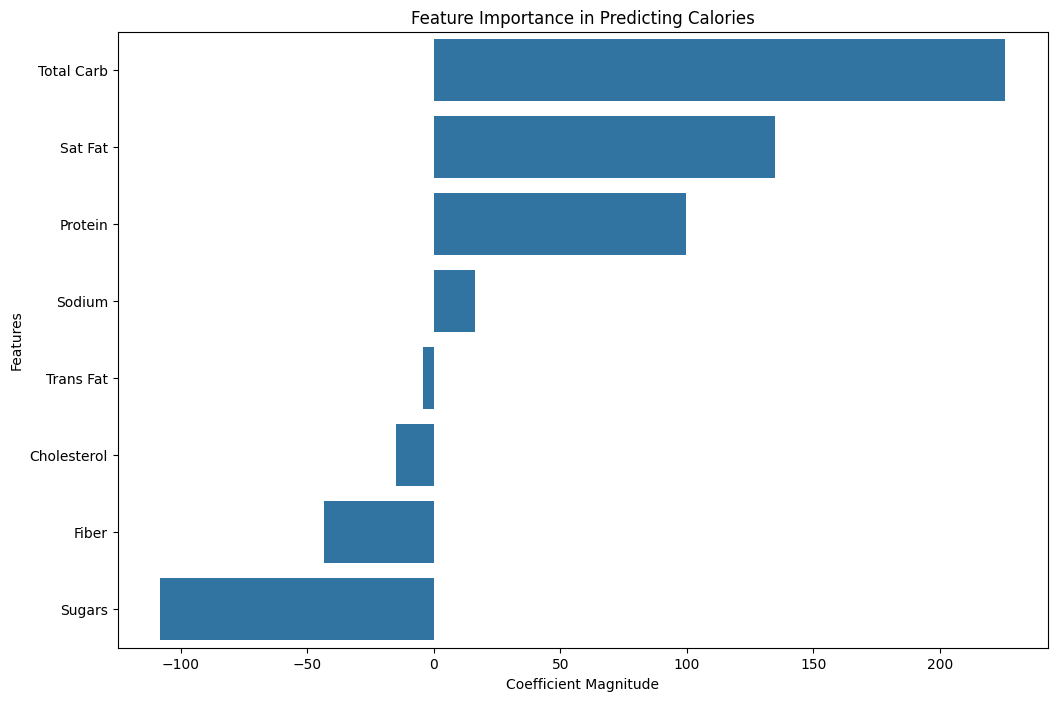

In [79]:
feature_importance2 = pd.DataFrame(ridge.coef_, index=X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance2['Coefficient'], y=feature_importance2.index)
plt.title('Feature Importance in Predicting Calories')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.show()

<h2 style="font-weight:bold; color:lightblue">Model 3: Random Forest Regression</h2>

<h3 style="font-weight:bold; color:orange">คำอธิบาย Models</h3>
<p><span style="font-weight:bold;">ชื่อ : </span>Random Forest Regression</p>
<p><span style="font-weight:bold;">หลักการ :</span>เป็นโมเดลที่มีพื้นฐานมาจาก Decision Tree โดยแทนที่จะใช้ Tree แค่อันเดียว เราจะใช้ Tree หลายๆ อันเพื่อสร้างเป็น Forest ขึ้นมา</p>
<p><span style="font-weight:bold;">วิธีการ :</span>ตัดข้อมูลประเภท Drinks ออก เพื่อเพิ่มความแม่นยำของโมเดล และใช้อัตราส่วน train:test ที่ 70:30 จากนั้นกำหนดค่าต่างๆ เช่น tree size และ random states</p>
<p><span style="font-weight:bold;">เหตุผลที่เลือกโมเดลนี้ :</span>เป็นโมเดลสำหรับข้อมูลที่มีความซับซ้อน ซึ่งแม่นยำกว่า Decision Tree เนื่องจาก Model นี้มีส่วนช่วยลดการ overfitting มากกว่า</p>
<p><span style="font-weight:bold;">ผลการประเมินโมเดล :</span>MSE: 7041.61
R2 Score: 0.93</p>

In [ ]:
X = data_filtered[['Sat Fat', 'Trans Fat', 'Cholesterol', 'Sodium', 'Total Carb', 'Fiber', 'Sugars', 'Protein']]
y = data_filtered['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 7041.613712121211
R² Score: 0.9341253892072268


In [94]:

# Predict RFR

for custom_data, actual_cal in zip(custom_datas, actual_calories):
    custom_data_reshaped = [custom_data]
    custom_pred = rf.predict(custom_data_reshaped)
    print(f'Predicted Calories: {custom_pred[0]:.2f}, Actual Calories: {actual_cal}')


Predicted Calories: 803.30, Actual Calories: 750
Predicted Calories: 522.70, Actual Calories: 530
Predicted Calories: 82.00, Actual Calories: 80
Predicted Calories: 727.70, Actual Calories: 680
Predicted Calories: 838.90, Actual Calories: 890
Predicted Calories: 448.90, Actual Calories: 430
Predicted Calories: 675.00, Actual Calories: 780


c:\Users\Win-hunter21346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Win-hunter21346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Win-hunter21346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Win-hunter21346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Win-hunter21346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\b

<h3 style="font-weight:bold; color:orange">Take Away</h3>
<p>Model ที่ 3 ให้คำตอบใกล้เคียงกับผลลัพธ์จริงๆ น้อยกว่า Model ที่ 1 และ Model ที่ 2 ในบางส่วน แต่ก็ทำได้ดีกว่าในบางส่วน

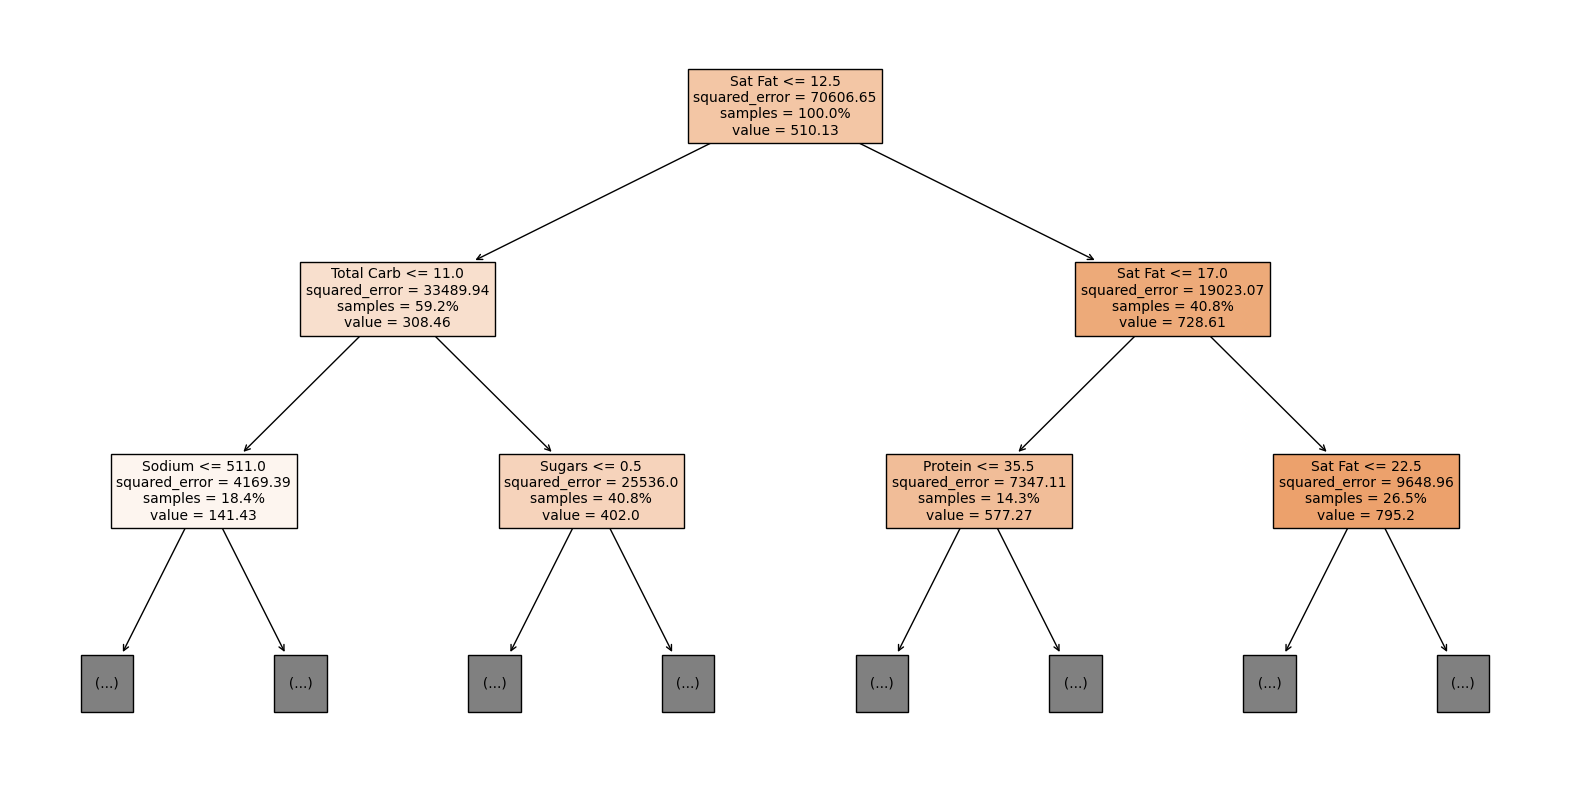

In [83]:
single_tree = rf.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(single_tree, 
          filled=True, 
          feature_names=X_train.columns, 
          max_depth=2,
          precision=2,
          proportion=True)
plt.show()


Visualization สำหรับ Random Forest Regression

<h1 style="text-align:center;">จบการนำเสนอ</h1>